## Import common packages

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
#Set display options
%matplotlib inline
rcParams['figure.figsize'] = 10, 6

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. This table includes:  
● name: the user's name  
● object_id: the user's id  
● email: email address  
● creation_source: how their account was created. This takes on one
of 5 values:  
○ PERSONAL_PROJECTS: invited to join another user's personal workspace  
○ GUEST_INVITE: invited to an organization as a guest (limited permissions)  
○ ORG_INVITE: invited to an organization (as a full member)  
○ SIGNUP: signed up via the website  
○ SIGNUP_GOOGLE_AUTH: signed up using Google  
Authentication (using a Google email account for their login id)  
● creation_time: when they created their account  
● last_session_creation_time: unix timestamp of last login  
● opted_in_to_mailing_list: whether they have opted into receiving marketing emails  
● enabled_for_marketing_drip: whether they are on the regular marketing email drip  
● org_id: the organization (group of users) they belong to  
● invited_by_user_id: which user invited them to join (if applicable)**


In [4]:
users = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")

In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [8]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


**A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.**

In [326]:
user_engagement = pd.read_csv("takehome_user_engagement.csv", encoding = "ISO-8859-1")

In [327]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [328]:
user_engagement.head(10)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


**Define an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period**

In [329]:
#Convert time_stamp to pandas datetime format and sort by time_stamp
user_engagement.time_stamp = pd.to_datetime(user_engagement.time_stamp)

In [330]:
#group by user_id & resample time_stamp to '1D', ie., all in between dates  are listed with NaN values
df = user_engagement.groupby('user_id').apply(lambda x: x.set_index('time_stamp').resample('1D').first())
df.drop(columns = 'user_id', inplace=True)

In [331]:
df.head(20)

visited
user_id time_stamp         
1       2014-04-22      1.0
2       2013-11-15      1.0
        2013-11-16      NaN
        2013-11-17      NaN
        2013-11-18      NaN
        2013-11-19      NaN
        2013-11-20      NaN
        2013-11-21      NaN
        2013-11-22      NaN
        2013-11-23      NaN
        2013-11-24      NaN
        2013-11-25      NaN
        2013-11-26      NaN
        2013-11-27      NaN
        2013-11-28      NaN
        2013-11-29      1.0
        2013-11-30      NaN
        2013-12-01      NaN
        2013-12-02      NaN
        2013-12-03      NaN

In [332]:
#Replace NaN with 0
df.fillna(0,inplace=True)

In [333]:
#use rolling() to roll through the dates with window of 7 days and sum the visited value within each window
df1 = df.groupby('user_id')['visited'].rolling(min_periods=1, window=7).sum()
df1 = df1.droplevel(0)
df = df1.to_frame()

In [334]:
df.head(100)

visited
user_id time_stamp         
1       2014-04-22      1.0
2       2013-11-15      1.0
        2013-11-16      1.0
        2013-11-17      1.0
        2013-11-18      1.0
        2013-11-19      1.0
        2013-11-20      1.0
        2013-11-21      1.0
        2013-11-22      0.0
        2013-11-23      0.0
        2013-11-24      0.0
        2013-11-25      0.0
        2013-11-26      0.0
        2013-11-27      0.0
        2013-11-28      0.0
        2013-11-29      1.0
        2013-11-30      1.0
        2013-12-01      1.0
        2013-12-02      1.0
        2013-12-03      1.0
        2013-12-04      1.0
        2013-12-05      1.0
        2013-12-06      0.0
        2013-12-07      0.0
        2013-12-08      0.0
        2013-12-09      1.0
        2013-12-10      1.0
        2013-12-11      1.0
        2013-12-12      1.0
        2013-12-13      1.0
        2013-12-14      1.0
        2013-12-15      1.0
        2013-12-16      0.0
        2013-12-17      0.0
        2013-12-18      0.0
        2013-12-19      0.0
        2013-12-20      0.0
        2013-12-21      0.0
        2013-12-22      0.0
        2013-12-23      0.0
        2013-12-24      0.0
        2013-12-25      1.0
        2013-12-26      1.0
        2013-12-27      1.0
        2013-12-28      1.0
        2013-12-29      1.0
        2013-12-30      1.0
        2013-12-31      2.0
        2014-01-01      1.0
        2014-01-02      1.0
        2014-01-03      1.0
        2014-01-04      1.0
        2014-01-05      1.0
        2014-01-06      1.0
        2014-01-07      0.0
        2014-01-08      1.0
        2014-01-09      1.0
        2014-01-10      1.0
        2014-01-11      1.0
        2014-01-12      1.0
        2014-01-13      1.0
        2014-01-14      1.0
        2014-01-15      0.0
        2014-01-16      0.0
        2014-01-17      0.0
        2014-01-18      0.0
        2014-01-19      0.0
        2014-01-20      0.0
        2014-01-21      0.0
        2014-01-22      0.0
        2014-01-23      0.0
        2014-01-24      0.0
        2014-01-25      0.0
        2014-01-26      0.0
        2014-01-27      0.0
        2014-01-28      0.0
        2014-01-29      0.0
        2014-01-30      0.0
        2014-01-31      0.0
        2014-02-01      0.0
        2014-02-02      0.0
        2014-02-03      1.0
        2014-02-04      1.0
        2014-02-05      1.0
        2014-02-06      1.0
        2014-02-07      1.0
        2014-02-08      2.0
        2014-02-09      3.0
        2014-02-10      2.0
        2014-02-11      2.0
        2014-02-12      2.0
        2014-02-13      3.0
        2014-02-14      3.0
        2014-02-15      2.0
        2014-02-16      2.0
        2014-02-17      2.0
        2014-02-18      2.0
        2014-02-19      2.0
        2014-02-20      1.0
        2014-02-21      1.0

In [335]:
#Add a column adopted, that shows True when rolling window sum >= 3
#Drop the unwanted column and index
df.loc[df['visited'] >= 3, 'adopted'] = True
df.loc[df['visited'] < 3, 'adopted'] = False
df.drop(columns='visited', inplace=True)
df.reset_index(level=1, drop=True, inplace=True)

In [336]:
#Group users by user_id and set adopted to True if there and any three separate days in at least one seven day period
df = df.groupby('user_id')['adopted'].any().to_frame()

In [337]:
df.reset_index(inplace=True)

In [338]:
#Merge with users dataframe on object_id column
users_adopted = pd.merge(users,df, how='left', left_on=['object_id'], right_on=['user_id'])

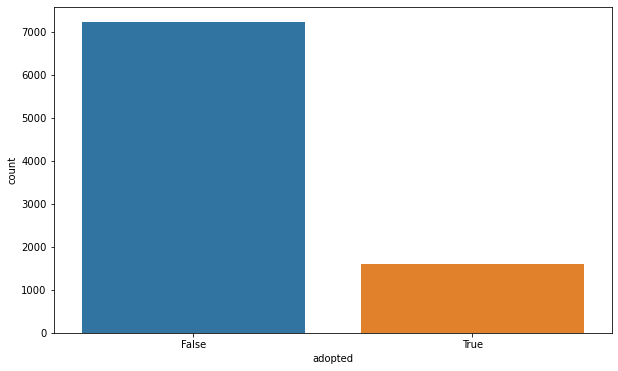

In [339]:
sns.countplot(x= 'adopted', data = users_adopted)

- It is evident that the user adoption ratio is very low. 

In [340]:
users_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     8823 non-null   float64
 11  adopted                     8823 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 1.5+ MB


In [341]:
#drop unwanted columns user_id, email, name, creation_time
users_adopted.drop(columns=['name','email','user_id','creation_time'],inplace=True)

In [342]:
#Use LabelEncoder to convert creation_source feature to numeric values and drop creation_source
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
users_adopted['creation_source_code'] = LE.fit_transform(users_adopted['creation_source'])
users_adopted.drop(columns=['creation_source'], inplace=True)

In [343]:
#Fill NAN in adopted column to False and convert to numeric type
users_adopted['adopted'].fillna(False, inplace=True)
users_adopted['adopted']= users_adopted['adopted'].astype(int)

In [344]:
#Lets check if we have all numeric features
users_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   last_session_creation_time  8823 non-null   float64
 2   opted_in_to_mailing_list    12000 non-null  int64  
 3   enabled_for_marketing_drip  12000 non-null  int64  
 4   org_id                      12000 non-null  int64  
 5   invited_by_user_id          6417 non-null   float64
 6   adopted                     12000 non-null  int64  
 7   creation_source_code        12000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.1 MB


In [345]:
#set all missing numeric values to 0
users_adopted['last_session_creation_time'].fillna(0, inplace=True)
users_adopted['invited_by_user_id'].fillna(0, inplace=True)

In [346]:
#Find the correlation between the features
corr = users_adopted.corr()
corr

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_code
object_id,1.000000,0.009651,-0.032370,-0.022040,0.004110,0.001657,0.005750,0.014072
last_session_creation_time,0.009651,1.000000,0.010916,0.012604,0.010231,0.021160,0.246048,0.154509
opted_in_to_mailing_list,-0.032370,0.010916,1.000000,0.483529,0.003432,0.007536,0.008097,-0.004563
enabled_for_marketing_drip,-0.022040,0.012604,0.483529,1.000000,0.009275,0.003431,0.004653,0.001282
org_id,0.004110,0.010231,0.003432,0.009275,1.000000,-0.040868,0.064523,0.012143
invited_by_user_id,0.001657,0.021160,0.007536,0.003431,-0.040868,1.000000,0.021596,-0.664132
adopted,0.005750,0.246048,0.008097,0.004653,0.064523,0.021596,1.000000,-0.003659
creation_source_code,0.014072,0.154509,-0.004563,0.001282,0.012143,-0.664132,-0.003659,1.000000


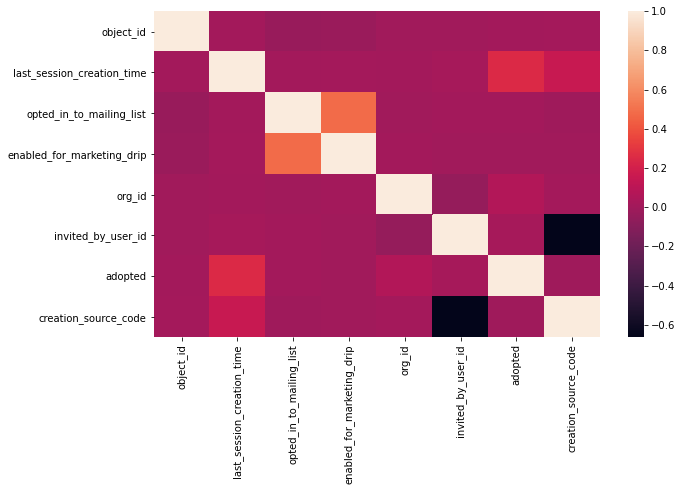

In [347]:
sns.heatmap(corr)

- opted_in_to_mailing_list & enabled_for_marketing_drip are correlated. we will drop opted_in_to_mailing_list.  
- invited_by_user_id and creation_source seems to be related. invited_by_user_id is available only for creation_source: 'GUEST_INVITE', 'ORG_INVITE'.

## Binary Classification Model

In [348]:
#Classification metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
modelScore_list = []
def model_score(name, y_pred, y_pred_prob, fit_time, pred_time, modelScore_list):
    accuracy = accuracy_score(y_pred, y_test) * 100
    roc_auc = roc_auc_score(y_test, y_pred_prob) * 100
    f1_1 = f1_score(y_test, y_pred, pos_label = 1)
    f1_0 = f1_score(y_test, y_pred, pos_label = 0)
    prec_1 = precision_score(y_test, y_pred, pos_label=1)
    prec_0 = precision_score(y_test, y_pred, pos_label=0)
    rec_1 = recall_score(y_test, y_pred, pos_label=1)
    rec_0 = recall_score(y_test, y_pred, pos_label=0)
    modelScore_list = modelScore_list.append([name, accuracy, roc_auc, f1_1, prec_1, rec_1,
                                              f1_0, prec_0, rec_0, fit_time, pred_time])
    return modelScore_list

In [349]:
#Set the independent variables X and dependent variable y
y = users_adopted['adopted']
X = users_adopted.drop(columns=['adopted'])

## Class Imbalance

In [350]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 10398, 1: 1602})


- We are dealing with imbalanced classes. We will use SMOTE technique

In [351]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
counter = Counter(y_smote)
print(counter)

Counter({0: 10398, 1: 10398})


In [352]:
#Split train and test date
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=42)

### Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
#Perform GridSearchCV for hyperparameter tuning
param_grid = {'C': np.arange(0.05, 4, 0.1)}
lr = LogisticRegression()
gridSearch_lr = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
gridSearch_lr.fit(X_train, y_train)
print(gridSearch_lr.best_params_)
print(gridSearch_lr.best_score_)

{'C': 0.05}
0.9058961346239496


In [354]:
import time
lr = gridSearch_lr.best_estimator_

#Fit the training set
fit_start = time.time()
lr.fit(X_train, y_train)
fit_end = time.time()

#Predict the test set
predict_start = time.time()
y_pred = lr.predict(X_test)
predict_end = time.time()
y_pred_prob = lr.predict_proba(X_test)[:,1]

#Model score
model_score('Log Reg',y_pred, y_pred_prob, (fit_end - fit_start), (predict_end - predict_start), modelScore_list )
model_score_pd = pd.DataFrame(modelScore_list, columns = ['Model', 'Accuracy(%)', 'ROC_AUC(%)', 'F1_1', 'Prec_1','Rec_1', 
                                                          'F1_0', 'Prec_0', 'Rec_0', 'Fit_Time(s)', 'Predict_Time(s)'])
model_score_pd

,Model,Accuracy(%),ROC_AUC(%),F1_1,Prec_1,Rec_1,F1_0,Prec_0,Rec_0,Fit_Time(s),Predict_Time(s)
0,Log Reg,65.721154,91.689055,0.743894,0.592222,1.0,0.481831,1.0,0.317377,0.014841,0.002185


### Random Forest

In [355]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs = -1)

# Define a grid of hyperparameter 'params_rf'
params_rf = {
    'n_estimators': [50, 100, 300, 500], 
    'min_samples_leaf': [5,10,20,30],
    'max_features': ['log2', 'sqrt', 'auto']
}

# Instantiate RandomSearchCV
randomSearch_rf = RandomizedSearchCV(estimator = rf, param_distributions = params_rf,
                                      n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit to training set
randomSearch_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    7.8s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.2s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [5, 10, 20, 30],
                                        'n_estimators': [50, 100, 300, 500]},
                   random_state=42, verbose=2)

In [356]:
# Extract best hyperparameters from RandomizedSearchCV
best_model = randomSearch_rf.best_params_ 
print('Best hyerparameters:\n', best_model)

Best hyerparameters:
 {'n_estimators': 500, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


In [357]:
#Instantiate a classifier with the best hyperparameters 
rf = randomSearch_rf.best_estimator_

fit_start = time.time()
rf.fit(X_train,y_train)
fit_end = time.time()

#predict review label for test dataset
predict_start = time.time()
y_pred = rf.predict(X_test)
predict_end = time.time()

y_pred_prob = rf.predict_proba(X_test)[:,1]

model_score('Random Forest',y_pred, y_pred_prob, (fit_end - fit_start), (predict_end - predict_start), modelScore_list)
model_score_pd = pd.DataFrame(modelScore_list, columns = ['Model', 'Accuracy(%)', 'ROC_AUC(%)', 'F1_1', 'Prec_1','Rec_1', 
                                                          'F1_0', 'Prec_0', 'Rec_0', 'Fit_Time(s)', 'Predict_Time(s)'])
model_score_pd

,Model,Accuracy(%),ROC_AUC(%),F1_1,Prec_1,Rec_1,F1_0,Prec_0,Rec_0,Fit_Time(s),Predict_Time(s)
0,Log Reg,65.721154,91.689055,0.743894,0.592222,1.0000,0.481831,1.000000,0.317377,0.014841,0.002185
1,Random Forest,89.519231,96.345022,0.893346,0.905305,0.8817,0.896975,0.885674,0.908569,1.527156,0.214190


### Identify which factors predict future user adoption

In [358]:
rf.feature_importances_

array([0.05762496, 0.68943326, 0.02553706, 0.01228767, 0.09168105,
       0.07408578, 0.04935022])

In [359]:
users_adopted.columns

Index(['object_id', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'adopted', 'creation_source_code'], dtype='object')

- 'last_session_creation_time' has the most influence, frequent email notifications can be sent to users who don't login for couple of weeks to increase user engagement.
- 'org_id' & 'invited_by_user_id' also has some influence.